### !pip install pandas numpy matplotlib seaborn scikit-learn 

In [1]:
# Importar paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
# Leer el conjunto de datos
iris_data = pd.read_csv('Iris.csv')

In [3]:
# Mostrar las primeras filas del DataFrame para una vista previa
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Aqui vemos una columna llamada "Id" en nnuestro conjunto de datos. Esta columna parece ser solo un identificador y no proporciona información relevante para nuestro análisis de machine learning. Hemos considerar eliminarla para que no afecte negativamente nuestros modelos.

In [4]:
# Eliminar la columna 'Id' ya que no aporta información relevante
iris_data.drop(columns=['Id'], inplace=True)

In [5]:
# Verificar información general del DataFrame, como tipos de datos y valores no nulos
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


#### Vemos que la columna "Species" tiene el tipo "object". Dado que esta columna es la variable objetivo en nuestro análisis, es importante asegurarse de que los valores sean categóricos y únicos. Vamos a usar data['Species'].unique() para verificar los valores únicos y confirmar que estén correctamente formateados.

In [6]:
# Obtener las especies únicas presentes en el conjunto de datos
unique_species = iris_data['Species'].unique()
print(unique_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Cada valor en la lista corresponde a una especie diferente de la planta Iris. Esto significa que la columna "Species" contiene tres clases diferentes: "Iris-setosa", "Iris-versicolor" y "Iris-virginica", y estos serán los valores que usaremos como etiquetas o variables objetivo en nuestro análisis de machine learning

#### Como planeamos aplicar algoritmos de machine learning, tendremos que convertir la columna "Species" en una forma numérica, ya que los algoritmos generalmente trabajan con números. Ahora "data_encoded" contendrá las columnas binarias correspondientes a las categorías de "Species"

In [7]:
# Convertir la columna 'Species' a variables numéricas usando codificación one-hot
data_encoded = pd.get_dummies(iris_data, columns=['Species'], prefix='Species')

In [8]:
# Comprobar y eliminar valores nulos si es necesario (en este caso, no hay valores nulos)
if iris_data.isnull().sum().any():
    iris_data.dropna(inplace=True)

#### Detección de valores nulos: Hemos utilizado el método data.isnull() para verificar la presencia de valores nulos en el DataFrame, . Es importante verificar y manejar los valores nulos, ya que pueden afectar el análisis y los modelos. Si hubieran valores nulos, se podría considerar eliminar filas con valores nulos o reemplazarlos con estrategias como la media de la columna.

In [9]:
# Calcular estadísticas descriptivas para el conjunto de datos
print(iris_data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


#### La exploración gráfica es una parte fundamental para comprender los datos

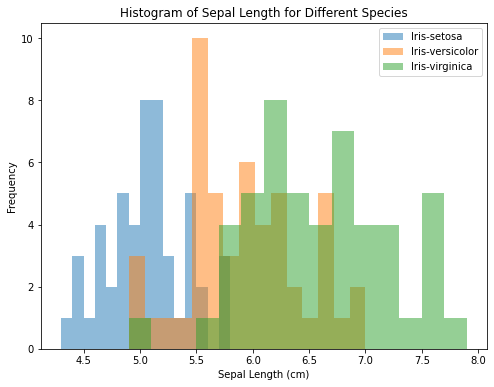

In [10]:
# Crear un histograma de SepalLengthCm para cada especie
plt.figure(figsize=(8, 6))
for species in unique_species:
    plt.hist(iris_data[iris_data['Species'] == species]['SepalLengthCm'], bins=15, alpha=0.5, label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length for Different Species')
plt.legend()
plt.show()

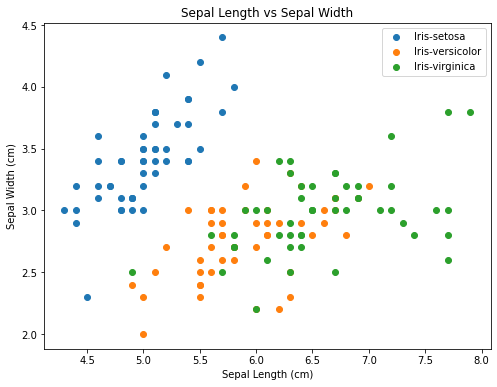

In [11]:
# Crear un diagrama de dispersión de SepalLengthCm vs SepalWidthCm para cada especie
plt.figure(figsize=(8, 6))
for species in unique_species:
    plt.scatter(iris_data[iris_data['Species'] == species]['SepalLengthCm'], iris_data[iris_data['Species'] == species]['SepalWidthCm'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

In [12]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

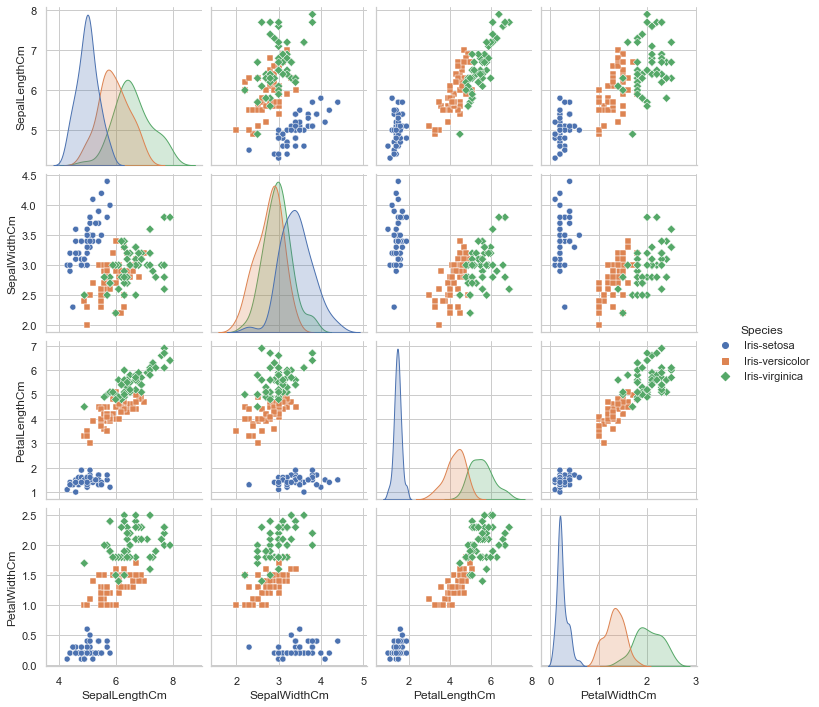

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Gráficos de distribución para cada característica en relación con la variable objetivo
sns.pairplot(iris_data, hue="Species", diag_kind="kde", markers=["o", "s", "D"])

# Mostrar los gráficos
plt.show()


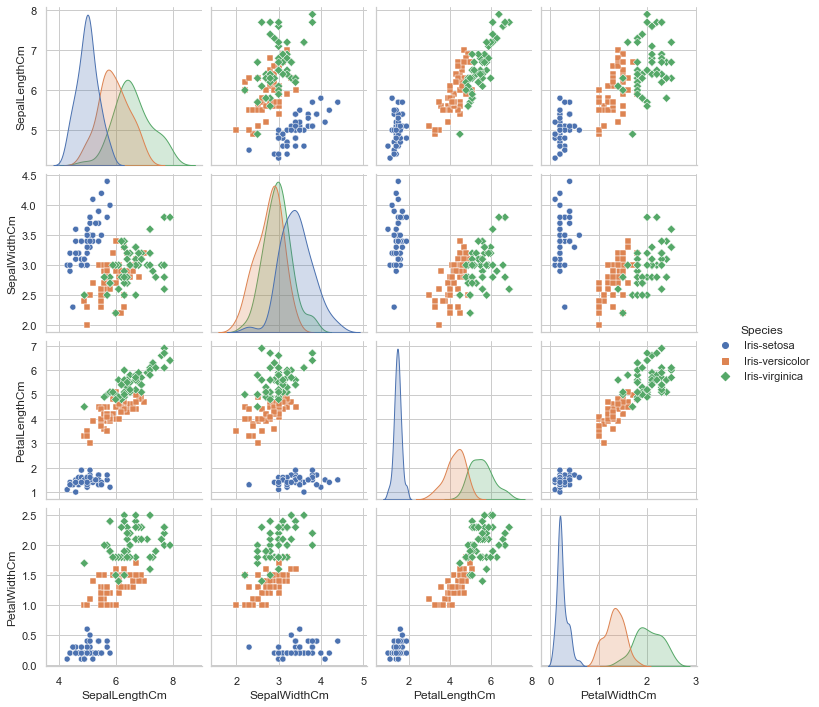

In [14]:
# Crear gráficos de distribución para cada característica en relación con la variable objetivo
sns.pairplot(iris_data, hue="Species", diag_kind="kde", markers=["o", "s", "D"])
# Mostrar los gráficos de distribución
plt.show()


#### Podemos calcular y visualizar la matriz de correlación entre las características numéricas para comprender mejor cómo están relacionadas entre sí. Esto puede ayudar a identificar patrones y posibles redundancias.

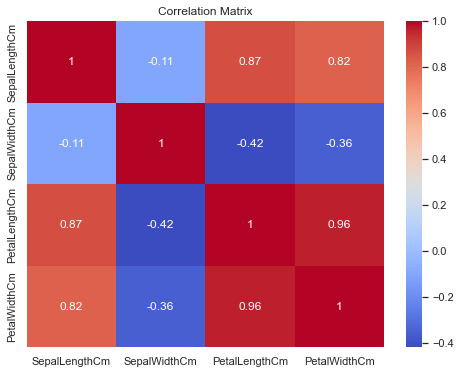

In [15]:
# Crear una matriz de correlación entre las características numéricas
numeric_data = iris_data.drop(columns=['Species'])  # Eliminar la columna 'Species' para el cálculo de correlación
correlation_matrix = numeric_data.corr()  # Calcular la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Separar el conjunto de datos en conjuntos de entrenamiento y prueba:
#### X = características del conjunto de datos. Aquí estás eliminando las columnas que representan las especies codificadas ('Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica') usando el método drop(). Esto significa que solo te quedas con las características numéricas para entrenar el modelo.
#### y = etiquetas de clase, que en este caso son las especies codificadas. Aquí seleccionas las columnas que representan las especies codificadas para utilizarlas como etiquetas en el entrenamiento del modelo.
#### X_train, X_test, y_train y y_test son conjuntos de entrenamiento y prueba para características y etiquetas respectivamente, creados usando la función train_test_split().



In [16]:
# Separar el conjunto de datos en conjuntos de entrenamiento y prueba
X = data_encoded.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])  # Mantén todas las características excepto las columnas de especies codificadas
y = data_encoded[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]  # Utiliza las columnas de especies codificadas como etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Transformar y_train en una matriz 1D de etiquetas de clases:

#### y_train_labels se crea usando el método idxmax(axis=1) en el DataFrame y_train. Esto convierte las etiquetas de las especies codificadas (que son columnas de 0s y 1s) en etiquetas de clase simples (como 'Species_Iris-setosa').

In [17]:
# Transformar y_train en una matriz 1D de etiquetas de clases
y_train_labels = y_train.idxmax(axis=1)

#### Crear un modelo de Regresión Logística y ajustarlo al conjunto de entrenamiento:
#### logreg_model es un modelo de Regresión Logística que se crea utilizando LogisticRegression() de scikit-learn.
#### logreg_model.fit(X_train, y_train_labels) ajusta el modelo a los datos de entrenamiento. Aquí, las características X_train se utilizan para entrenar el modelo y las etiquetas y_train_labels se utilizan como objetivos.

In [18]:
# Crear un modelo de Regresión Logística y ajustarlo al conjunto de entrenamiento
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train_labels)

LogisticRegression()

#### Realizar predicciones en el conjunto de prueba:
#### y_pred_labels se crea aplicando el modelo entrenado logreg_model a las características del conjunto de prueba X_test. Esto genera predicciones para las etiquetas de clase.

In [19]:
# Realizar predicciones en el conjunto de prueba
y_pred_labels = logreg_model.predict(X_test)

#### Mostrar el informe de clasificación:
#### classification_report() genera un informe detallado que muestra diversas métricas de rendimiento del modelo en función de las predicciones y las etiquetas verdaderas. Los valores como precisión, recuperación y puntuaciones F1 se calculan para cada clase (en este caso, especies) y también se presentan estadísticas agregadas.

In [20]:
# Mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test.idxmax(axis=1), y_pred_labels))

Classification Report:
                          precision    recall  f1-score   support

    Species_Iris-setosa       1.00      1.00      1.00        10
Species_Iris-versicolor       1.00      1.00      1.00         9
 Species_Iris-virginica       1.00      1.00      1.00        11

               accuracy                           1.00        30
              macro avg       1.00      1.00      1.00        30
           weighted avg       1.00      1.00      1.00        30



### El modelo de clasificación desarrollado en este proyecto alcanzó una precisión del 100% en todas las clases del conjunto de datos de Iris. Este rendimiento es comparable a los resultados que se han informado en otros estudios, lo que indica que el modelo es capaz de predecir la especie de una flor Iris con gran precisión.